# Primeiros Casos de COVID19 no Canadá

### Carregamento das bibliotecas

In [1]:
%matplotlib inline
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns
from qgis.core import *


import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from qgis.core import *
from qgis.PyQt.QtGui import *
from qgis.PyQt.QtCore import *
from IPython.display import Image

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import requests
import io

sns.set_context('talk')
plt.style.use('seaborn-whitegrid')


Começar Qgis  GUI e começar um projeto

In [2]:
QgsApplication.setPrefixPath(r'C:\\OSGeo4W64\\apps\\qgis', True)
qgs = QgsApplication([], True)
qgs.initQgis()
sys.path.append(r'C:\OSGeo4W64\apps\qgis\python\plugins')
project = QgsProject.instance()

### Carregamento dos dados

Let's load data

In [54]:
df = pd.read_csv(open('C:\\Users\\anaca\\Desktop\\Projeto_canada\\dados_estatistica\\cases_200.csv'))
df.head()

,case_id,provincial_case_id,age,sex,health_region,province,country,date_report,report_week,travel_yn,travel_history_country,locally_acquired,case_source,additional_info,additional_source,method_note;;;
0,1,1,50-59,Male,Toronto,Ontario,Canada,25-01-2020,19-01-2020,1,China,NaN,(1) https://news.ontario.ca/mohltc/en/2020/01/...,NaN,NaN,NaN
1,2,2,50-59,Female,Toronto,Ontario,Canada,27-01-2020,26-01-2020,1,China,NaN,(1) https://news.ontario.ca/mohltc/en/2020/01/...,NaN,NaN,NaN
2,3,1,40-49,Male,Vancouver Coastal,BC,Canada,28-01-2020,26-01-2020,1,China,NaN,https://news.gov.bc.ca/releases/2020HLTH0015-0...,NaN,NaN,NA;;;
3,4,3,20-29,Female,Middlesex-London,Ontario,Canada,31-01-2020,26-01-2020,1,China,NaN,(1) https://news.ontario.ca/mohltc/en/2020/01/...,NaN,NaN,NaN
4,5,2,50-59,Female,Vancouver Coastal,BC,Canada,04-02-2020,02-02-2020,0,NaN,Close Contact,https://news.gov.bc.ca/releases/2020HLTH0023-0...,The individual had close contact with family v...,NaN,NA;;;


In [49]:
def load_timeseries(name):
    #base_url='https://github.com/dsfsi/covid19za/blob/master/data'
    #url = f'{base_url}/covid19za_timeline_{name}.csv'
    #csv = requests.get(url).text
    #print(csv)
    df = pd.read_csv(name)
    print(df.head())
    df = (df.set_index('date_report'))
    df.index = pd.to_datetime(df.index,dayfirst=True)
    
    return df

df = load_timeseries('C:\\Users\\anaca\\Desktop\\Projeto_canada\\dados_estatistica\\cases_200.csv')

   case_id  provincial_case_id    age     sex      health_region province  \
0        1                   1  50-59    Male            Toronto  Ontario   
1        2                   2  50-59  Female            Toronto  Ontario   
2        3                   1  40-49    Male  Vancouver Coastal       BC   
3        4                   3  20-29  Female   Middlesex-London  Ontario   
4        5                   2  50-59  Female  Vancouver Coastal       BC   

  country date_report report_week travel_yn travel_history_country  \
0  Canada  25-01-2020  19-01-2020         1                  China   
1  Canada  27-01-2020  26-01-2020         1                  China   
2  Canada  28-01-2020  26-01-2020         1                  China   
3  Canada  31-01-2020  26-01-2020         1                  China   
4  Canada  04-02-2020  02-02-2020         0                    NaN   

  locally_acquired                                        case_source  \
0              NaN  (1) https://news.ontari

## Análise do crescimento do Covid-19 nos 18 primeiros dias

In [52]:
def plot_confirmed(provinces, min_cases=100, ls='-'):
    for province in provinces:
        
        df1 = df.loc[(df.province == province)].groupby(['date_report']).agg({'country': ['count']})
        df1.columns = ['new cases']
        df1['cummulative'] = df1['new cases'].cumsum()
        (df1.reset_index()['cummulative']
            .plot(label=province, ls=ls))
        print('\n' + province +":")
        print(df1)


Ontario:
             new cases  cummulative
date_report                        
2020-01-25           1            1
2020-01-27           1            2
2020-01-31           1            3
2020-02-23           1            4
2020-02-26           1            5
2020-02-27           1            6
2020-02-28           2            8
2020-02-29           3           11
2020-03-01           4           15
2020-03-03           5           20
2020-03-05           2           22
2020-03-06           6           28
2020-03-08           4           32
2020-03-09           3           35
2020-03-10           1           36
2020-03-11           5           41
2020-03-12          17           58
2020-03-13          20           78
2020-03-14           4           82

BC:
             new cases  cummulative
date_report                        
2020-01-28           1            1
2020-02-04           1            2
2020-02-06           2            4
2020-02-14           1            5
2020-02-20   

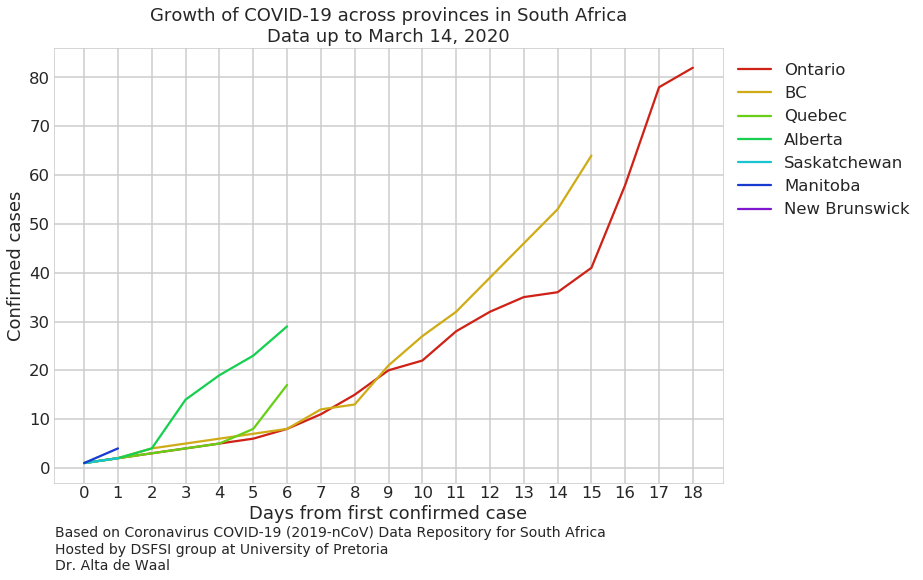

In [53]:
sns.set_palette(sns.hls_palette(8, l=.45, s=.8)) # 8 countries max
fig, ax = plt.subplots(figsize=(12, 8))

provinces = ['Ontario', 'BC', 'Quebec','Alberta', 'Saskatchewan', 'Manitoba', 'New Brunswick']
plot_confirmed(provinces, min_cases=1, ls='-')

#x = np.linspace(0, plt.xlim()[1])
#plt.plot(x,x+(1.33), ls='--', color='k', label='33% daily growth')

#plt.yscale('log');
plt.title('Growth of COVID-19 across provinces in South Africa' + '\n' +'Data up to {}'.format(df.index.max().strftime('%B %d, %Y')))
plt.xlabel('Days from first confirmed case')
plt.ylabel('Confirmed cases')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_xticks(range(0,int(plt.xlim()[1])+1))
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc='upper center',bbox_to_anchor=(1.15,1))
#sns.despine()
text = plt.text(0.0015, -0.2,'Based on Coronavirus COVID-19 (2019-nCoV) Data Repository for South Africa \nHosted by DSFSI group at University of Pretoria\nDr. Alta de Waal', 
         transform=ax.transAxes, fontsize=14)
plt.savefig('C:\\Users\\anaca\\Desktop\\Projeto_canada\\dados_estatistica', 
               bbox_inches='tight', 
               transparent=True,
               pad_inches=0, dpi = 200)

## Qual é a distribuíção de pessoas infetadas por idade?

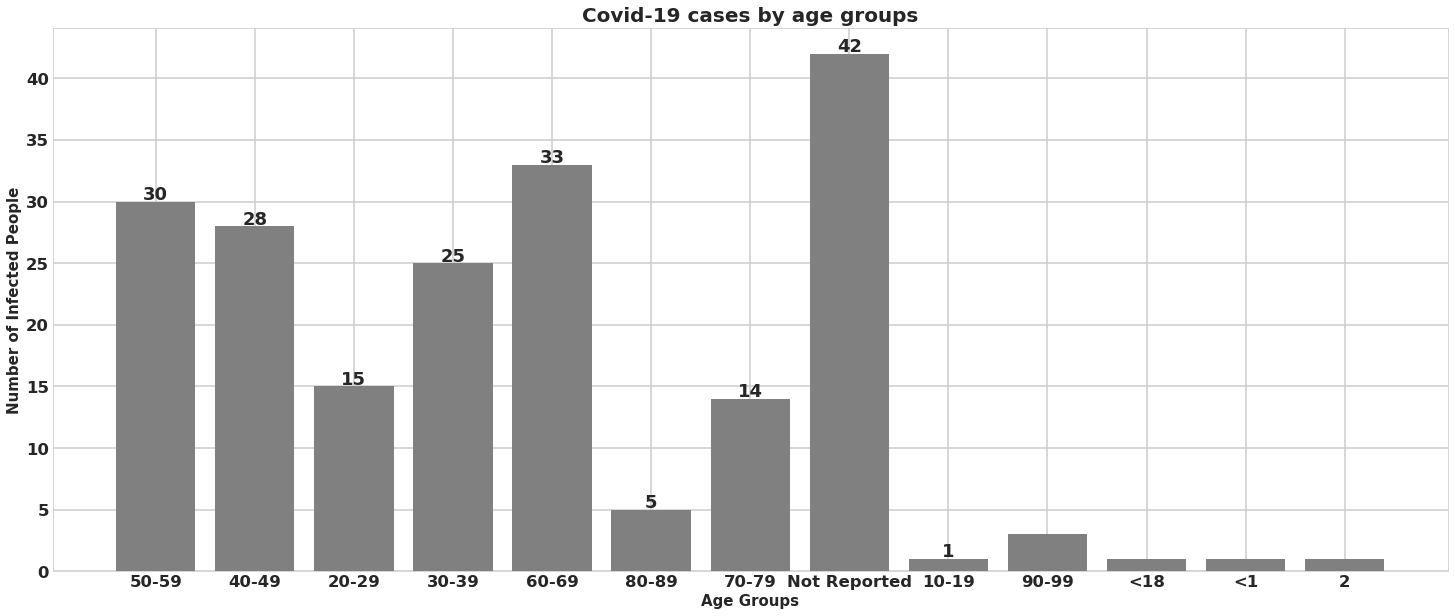

In [58]:
from collections import Counter

fig, ax = plt.subplots(1,1,figsize=(25,10))
# read csv
df = pd.read_csv('C:\\Users\\anaca\\Desktop\\Projeto_canada\\dados_estatistica\\cases_200.csv')

ageCount= Counter(df['age'])

#Start With Graph Plotting

plt.rcParams['font.family'] = 'Graphik'                        #Specify font 
plt.bar(range(len(ageCount)), list(ageCount.values()), color= 'grey', align='center')  #Accenture colours added
plt.xticks(range(len(ageCount)), list(ageCount.keys()),fontweight='black')
plt.yticks(fontweight='black')

plt.xlabel('Age Groups', fontsize= 15,fontweight='black')
plt.ylabel('Number of Infected People',fontsize= 15,fontweight='black')
plt.title('Covid-19 cases by age groups',fontsize= 20,fontweight='black')
plt.rcParams['axes.linewidth']=0.8
#plt.grid(b=True, color='k', linestyle=':', lw=.5, zorder=1)   #Optional grid lines

xs=[0,1,2,3,4,5,6,7,8]                                         #Necessary to form x,y pair

for x,y in zip(xs,list(ageCount.values())):

    label = y

    plt.annotate(label,                                        # this is the text
                 (x,y),                                        # this is the point to label
                 textcoords="offset points",                   # how to position the text
                 xytext=(0,2),                                 # distance from text to points (x,y)
                 ha='center',                                  # horizontal alignment can be left, right or center
                 fontweight='black')     

## Qual é a distribuíção de pessoas infetadas por sexo?

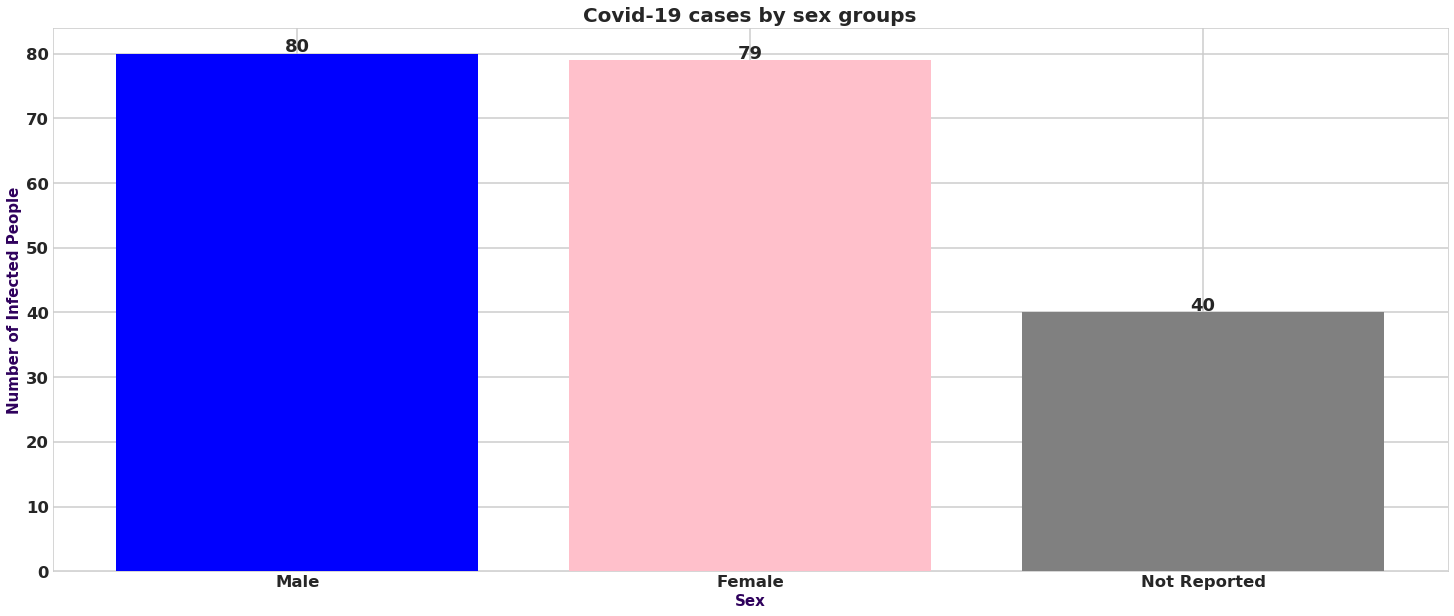

In [60]:
from collections import Counter

fig, ax = plt.subplots(1,1,figsize=(25,10))
# read csv
df = pd.read_csv('C:\\Users\\anaca\\Desktop\\Projeto_canada\\dados_estatistica\\cases_200.csv')

ageCount= Counter(df['sex'])

#Start With Graph Plotting

plt.rcParams['font.family'] = 'Graphik'                        #Specify font 
plt.bar(range(len(ageCount)), list(ageCount.values()), color= ['blue','pink','grey'], align='center')  #Accenture colours added
plt.xticks(range(len(ageCount)), list(ageCount.keys()),fontweight='black')
plt.yticks(fontweight='black')

plt.xlabel('Sex', fontsize= 15,fontweight='black', color= "#2e005c")
plt.ylabel('Number of Infected People',fontsize= 15,fontweight='black', color= "#2e005c")
plt.title('Covid-19 cases by sex groups',fontsize= 20,fontweight='black')
plt.rcParams['axes.linewidth']=0.8
#plt.grid(b=True, color='k', linestyle=':', lw=.5, zorder=1)   #Optional grid lines

xs=[0,1,2,3,4,5,6,7,8]                                         #Necessary to form x,y pair

for x,y in zip(xs,list(ageCount.values())):

    label = y

    plt.annotate(label,                                        # this is the text
                 (x,y),                                        # this is the point to label
                 textcoords="offset points",                   # how to position the text
                 xytext=(0,2),                                 # distance from text to points (x,y)
                 ha='center',                                  # horizontal alignment can be left, right or center
                 fontweight='black')     

## País

Quais os países visitados pelos infetados antes de chegar ao Canadá

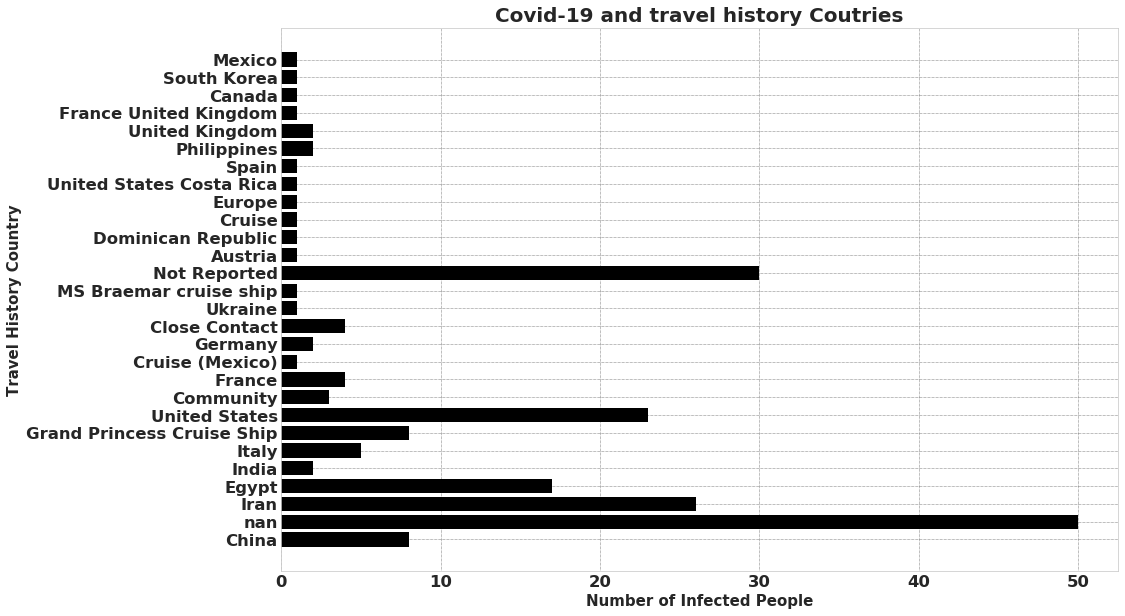

In [61]:
from collections import Counter

fig, ax = plt.subplots(1,1,figsize=(15,10))
# read csv
df = pd.read_csv('C:\\Users\\anaca\\Desktop\\Projeto_canada\\dados_estatistica\\cases_200.csv')

ageCount= Counter(df['travel_history_country'])

#Start With Graph Plotting

plt.rcParams['font.family'] = 'Graphik'                        #Specify font 
plt.barh(range(len(ageCount)), list(ageCount.values()), align='center', color='black')  #Accenture colours added
plt.yticks(range(len(ageCount)), list(ageCount.keys()),fontweight='black')
plt.xticks(fontweight='black')

plt.xlabel('Number of Infected People', fontsize= 15,fontweight='black')
plt.ylabel('Travel History Country',fontsize= 15,fontweight='black')
plt.title('Covid-19 and travel history Coutries',fontsize= 20,fontweight='black')
plt.rcParams['axes.linewidth']=0.8
plt.grid(b=True, color='k', linestyle=':', lw=.5, zorder=1)   #Optional grid lines

